Gradient Boosting is a popular boosting algorithm in machine learning used for classification and regression tasks. Boosting is one kind of ensemble Learning method which trains the model sequentially and each new model tries to correct the previous model. It combines several weak learners into strong learners. There is two most popular boosting algorithm i.e

1. AdaBoost
2. Gradient Boosting

Gradient Boosting

Gradient Boosting is a powerful boosting algorithm that combines several weak learners into strong learners, in which each new model is trained to minimize the loss function such as mean squared error or cross-entropy of the previous model using gradient descent. In each iteration, the algorithm computes the gradient of the loss function with respect to the predictions of the current ensemble and then trains a new weak model to minimize this gradient. The predictions of the new model are then added to the ensemble, and the process is repeated until a stopping criterion is met.

In contrast in AdaBoost, the weights of the training instances are not tweaked, instead, each predictor is trained using the residual errors of the predecessor as labels. There is a technique called the Gradient Boosted Trees whose base learner is CART (Classification and Regression Trees). The below diagram explains how gradient-boosted trees are trained for regression problems.

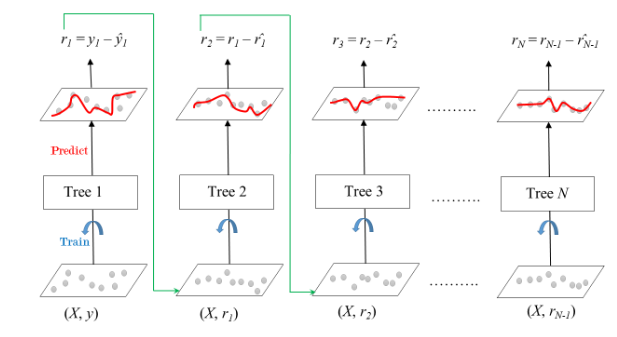

The ensemble consists of M trees. Tree1 is trained using the feature matrix X and the labels y. The predictions labeled y1(hat) are used to determine the training set residual errors r1. Tree2 is then trained using the feature matrix X and the residual errors r1 of Tree1 as labels. The predicted results r1(hat) are then used to determine the residual r2. The process is repeated until all the M trees forming the ensemble are trained. There is an important parameter used in this technique known as Shrinkage. Shrinkage refers to the fact that the prediction of each tree in the ensemble is shrunk after it is multiplied by the learning rate (eta) which ranges between 0 to 1. There is a trade-off between eta and the number of estimators, decreasing learning rate needs to be compensated with increasing estimators in order to reach certain model performance. Since all trees are trained now, predictions can be made. Each tree predicts a label and the final prediction is given by the formula,

y(pred) = y1 + (eta *  r1) + (eta * r2) + ....... + (eta * rN) #y1 is actual values

Difference between Adaboost and Gradient Boosting

The difference between AdaBoost and gradient boosting are as follows:

AdaBoost                                                        

1. During each iteration in AdaBoost, the weights of incorrectly classified samples are increased, so that the next weak learner focuses more on these samples.

2. AdaBoost uses simple decision trees with one split known as the decision stumps of weak learners.

3. AdaBoost is more susceptible to noise and outliers in the data, as it assigns high weights to misclassified samples.

Gradient Boosting

1. Gradient Boosting updates the weights by computing the negative gradient of the loss function with respect to the predicted output.

2. Gradient Boosting can use a wide range of base learners, such as decision trees, and linear models.

3. Gradient Boosting is generally more robust, as it updates the weights based on the gradients, which are less sensitive to outliers.

Example: 1 Classifiaction
    
Steps:

1. Import the necessary libraries

2. Setting SEED for reproducibility

3. Load the digit dataset and split it into train and test.

4. Instantiate Gradient Boosting classifier and fit the model.

5. Predict the test set and compute the accuracy score.

In [6]:
# Import models and utility functions
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

# Setting SEED for reproducibility
SEED = 23

# Importing the dataset
X, y = load_digits(return_X_y=True)

# Splitting dataset
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.25, random_state = SEED)

# Instantiate Gradient Boosting Regressor
gbc = GradientBoostingClassifier(n_estimators=300,
                                learning_rate=0.05,
                                random_state=100,
                                max_features=5 )
# Fit to training set
gbc.fit(train_X, train_y)

# Predict on test set
pred_y = gbc.predict(test_X)

# accuracy
acc = accuracy_score(test_y, pred_y)
print("Gradient Boosting Classifier accuracy is : {:.2f}".format(acc))

Gradient Boosting Classifier accuracy is : 0.98


Example: 2 Regression
    
Steps:

1. Import the necessary libraries
2. Setting SEED for reproducibility
3. Load the diabetes dataset and split it into train and test.
4. Instantiate Gradient Boosting Regressor and fit the model.
5. Predict on the test set and compute RMSE.

In [4]:
# Import the necessary libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

# Setting SEED for reproducibility
SEED = 23

# Importing the dataset
X, y = load_diabetes(return_X_y=True)

print(y)
# Splitting dataset
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.25, random_state = SEED)

# Instantiate Gradient Boosting Regressor
gbr = GradientBoostingRegressor(loss='squared_error',           #'ls' refers to least squares regression.
                                learning_rate=0.1,
                                n_estimators=300,
                                max_depth = 1,
                                random_state = SEED,
                                max_features = 5) 

# Fit to training set
gbr.fit(train_X, train_y)

# Predict on test set
pred_y = gbr.predict(test_X)

# test set RMSE
test_rmse = mean_squared_error(test_y, pred_y) ** (1 / 2)

# Print rmse
print('Root mean Square error: {:.2f}'.format(test_rmse))

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

### You can refer to the documentation of both the algos and check with different parameters

### Also try using these algos on your other datasets and compare the result with our regular algos like DT, RF, NB, SVM, KNN, Logistic or Linear regression based upon your business problem and the data

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 23

# Importing the dataset
X, y = load_digits(return_X_y=True)

# Splitting dataset
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.25, random_state = SEED)

#X, y = load_diabetes(return_X_y=True)
#train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.25, random_state = SEED)

#Running various models
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('GBC',GradientBoostingClassifier(n_estimators=300,
                                learning_rate=0.05,
                                random_state=100,
                                max_features=5)))

import time

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    start_time = time.time()
    model.fit(train_X,train_y)

    y_pred = model.predict(test_X)
    predictions = [round(value) for value in y_pred]


    # evaluate predictions
    accuracy = accuracy_score(test_y, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0),name)
    print("--- %s seconds ---" % (time.time() - start_time))
    

C:\Users\Pranav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 96.67% LogisticRegression
--- 0.16461968421936035 seconds ---
Accuracy: 98.22% KNN
--- 0.3089146614074707 seconds ---
Accuracy: 99.11% SVM
--- 0.12032485008239746 seconds ---
Accuracy: 97.78% GBC
--- 5.787529945373535 seconds ---
